In [129]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install pydot>=1.2.4
import pydot
#!pip install pydotplus
import pydotplus
from IPython.display import Image
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn import svm, datasets
from scipy import interp
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [63]:
features = pd.read_csv("one_hot_features.csv")

In [64]:
feature_list = list(features.columns)
feature_list

['percentage_reg_seats_activated',
 'car_pings_since_agreement_start_channel_partner_csn',
 'car_pings_since_agreement_start_country_code',
 'discount_rate',
 'renewal_rate',
 'parent_named_account_flg',
 'named_account_flg',
 'self_parented',
 'bmt_product_groupIC/Suites',
 'bmt_product_groupLT Family',
 'bmt_product_groupOther',
 'customer_size_codeSMB',
 'customer_size_codeUNK',
 'customer_size_codeVSB',
 'country_codeAI',
 'country_codeAR',
 'country_codeAT',
 'country_codeAU',
 'country_codeAW',
 'country_codeAZ',
 'country_codeBD',
 'country_codeBE',
 'country_codeBG',
 'country_codeBH',
 'country_codeBO',
 'country_codeBR',
 'country_codeBW',
 'country_codeCA',
 'country_codeCH',
 'country_codeCL',
 'country_codeCM',
 'country_codeCN',
 'country_codeCO',
 'country_codeCR',
 'country_codeCY',
 'country_codeCZ',
 'country_codeDE',
 'country_codeDK',
 'country_codeDO',
 'country_codeEC',
 'country_codeEE',
 'country_codeEG',
 'country_codeES',
 'country_codeFI',
 'country_codeFJ',


In [65]:
car = ['car_days_used_since_agreement_start_channel_partner_csn',
 'car_pct_days_used_since_agreement_start_channel_partner_csn',
 'car_pings_since_agreement_start_channel_partner_csn',
 'car_used_in_last_7_days_channel_partner_csn',
 'car_used_in_previous_one_month_channel_partner_csn',
 'car_used_in_previous_three_months_channel_partner_csn',
 'car_days_used_in_last_7_days_channel_partner_csn',
 'car_pings_in_last_7_days_channel_partner_csn',
 'car_days_used_in_previous_one_month_channel_partner_csn',
 'car_pings_in_previous_one_month_channel_partner_csn',
 'car_days_used_in_previous_second_month_channel_partner_csn',
 'car_pings_in_previous_second_month_channel_partner_csn',
 'car_days_used_in_previous_third_month_channel_partner_csn',
 'car_pings_in_previous_third_month_channel_partner_csn',
 'car_days_used_in_previous_fourth_month_channel_partner_csn',
 'car_pings_in_previous_fourth_month_channel_partner_csn',
 'percentage_reg_seats_activated_channel_partner_csn',
 'discount_rate_channel_partner_csn',
 'car_days_used_since_agreement_start_country_code',
 'car_pct_days_used_since_agreement_start_country_code',
 'car_pings_since_agreement_start_country_code',
 'car_used_in_last_7_days_country_code',
 'car_used_in_previous_one_month_country_code',
 'car_used_in_previous_three_months_country_code',
 'car_days_used_in_last_7_days_country_code',
 'car_pings_in_last_7_days_country_code',
 'car_days_used_in_previous_one_month_country_code',
 'car_pings_in_previous_one_month_country_code',
 'car_days_used_in_previous_second_month_country_code',
 'car_pings_in_previous_second_month_country_code',
 'car_days_used_in_previous_third_month_country_code',
 'car_pings_in_previous_third_month_country_code',
 'car_days_used_in_previous_fourth_month_country_code',
 'car_pings_in_previous_fourth_month_country_code']

# Features and Targets and Convert Data to Arrays

In [66]:
# Labels are the values we want to predict
labels = np.array(features['activation_label'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop(['activation_label', 'percentage_reg_seats_activated'], axis = 1)
#features= features.drop(car, axis = 1)

In [67]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [135]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# 1. Random Forest

In [69]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [70]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.49 degrees.


In [71]:
rf.score(test_features, test_labels)

0.72995220392989912

In [78]:
y_pred_rf = rf.predict_proba(test_features)

In [131]:
test_labels

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ..., 
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [73]:
s = pd.Series(test_labels.tolist())
test_Y = pd.get_dummies(s)
test_Y = test_Y.values

In [130]:
test_labels = label_binarize(test_labels, classes=[1, 2, 3])
n_classes = y.shape[1]

In [91]:

# Compute ROC curve and ROC area for each class
#classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 1000, random_state = 42))
#y_score = classifier.fit(train_features, train_labels).decision_function(test_features)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:,i], y_pred_rf[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_Y.ravel(), y_pred_rf.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

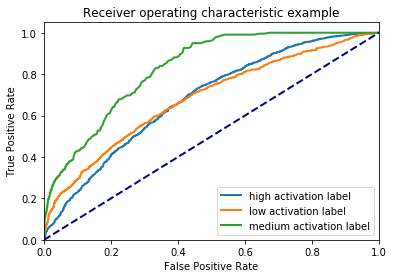

In [117]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], lw=lw, label='high activation label')
plt.plot(fpr[0], tpr[0], lw=lw, label='low activation label')
plt.plot(fpr[1], tpr[1], lw=lw, label='medium activation label')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [134]:
y_pred_rf

array([[ 0.448,  0.008,  0.544],
       [ 0.104,  0.001,  0.895],
       [ 0.353,  0.146,  0.501],
       ..., 
       [ 0.395,  0.118,  0.487],
       [ 0.357,  0.08 ,  0.563],
       [ 0.196,  0.075,  0.729]])

In [137]:
print(confusion_matrix(test_labels, predictions, labels=range(n_classes)))

[[  0   0   0]
 [  0 186   3]
 [  0  12  23]]


Confusion matrix, without normalization
[[  0   0   0]
 [  0 186   3]
 [  0  12  23]]


E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Normalized confusion matrix
[[  nan   nan   nan]
 [ 0.    0.98  0.02]
 [ 0.    0.34  0.66]]


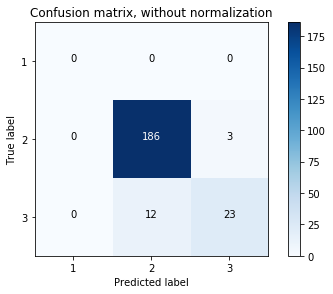

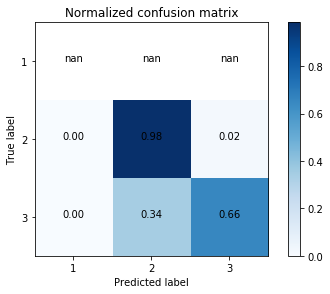

In [142]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, predictions, labels=range(n_classes))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1, 2, 3],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1, 2, 3], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Visualizing a Single Decision Tree

In [29]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

true positive, false positive

In [42]:
y_test.shape

(75, 3)

In [34]:
y_score.shape

(75, 3)

In [52]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

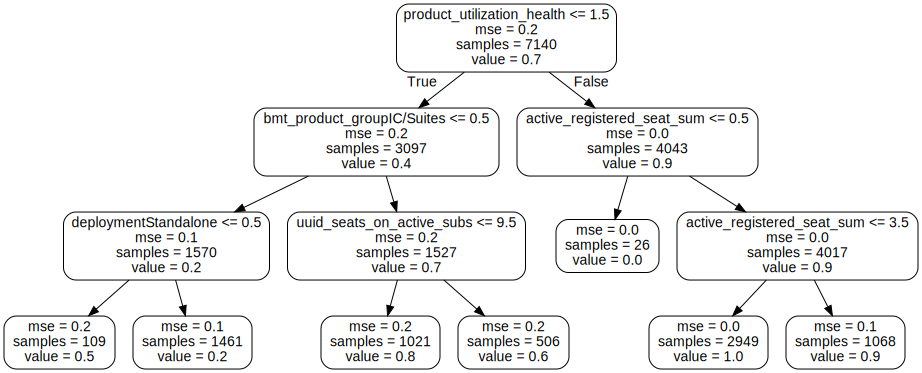

In [51]:
import graphviz
from IPython.display import display
display(graphviz.Source(graph))

# Variable Importances 

In [40]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: product_utilization_health Importance: 0.32
Variable: bmt_product_groupIC/Suites Importance: 0.16
Variable: uuid_age_days        Importance: 0.06
Variable: days_since_order_created Importance: 0.05
Variable: uuid_seats_on_active_subs Importance: 0.04
Variable: active_registered_seat_sum Importance: 0.04
Variable: discount_rate        Importance: 0.03
Variable: srp_billed_usd       Importance: 0.02
Variable: total_billed_usd     Importance: 0.02
Variable: parent_owner_uuid_count Importance: 0.02
Variable: percentage_reg_seats_activated_channel_partner_csn Importance: 0.02
Variable: sf_subscription_seats_billed Importance: 0.01
Variable: deploymentStandalone Importance: 0.01
Variable: renewal_rate         Importance: 0.01
Variable: self_parented        Importance: 0.01
Variable: hier_industry_group_nameMFG Importance: 0.01
Variable: onboarding_health    Importance: 0.01
Variable: access_health        Importance: 0.01
Variable: support_health       Importance: 0.01
Variable: dis

In [ ]:
names = ["car_pings_since_agreement_start_channel_partner_csn", "car_pings_since_agreement_start_country_code", "discount_rate",  "renewal_rate", "parent_named_account_flg", "named_account_flg", "self_parented", "bmt_product_group", "customer_size_code", "country_code", "billing_behavior", "bmt_channel", "uuid_age_days", "days_since_order_created", "uuid_seats_on_active_subs" , "active_registered_seat_sum" , "srp_billed_usd" , "parent_owner_uuid_count" , "hier_industry_group_name" , "active_registered_seat_sum_partner"]

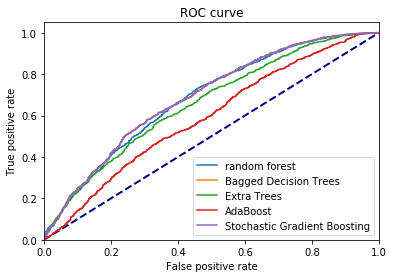

In [116]:
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr[2], tpr[2], label='random forest')
plt.plot(fpr_bdt[2], tpr_bdt[2], label='Bagged Decision Trees')
plt.plot(fpr_et[2], tpr_et[2], label='Extra Trees')
plt.plot(fpr_ab[2], tpr_ab[2], label='AdaBoost')
plt.plot(fpr_sgb[2], tpr_sgb[2], label='Stochastic Gradient Boosting')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# 2. Bagged Decision Trees

In [95]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier(max_depth=5)
num_trees = 1000
bdt = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
# Train the model on training data
bdt.fit(train_features, train_labels);
y_pred_bdt = bdt.predict_proba(test_features)

In [125]:
results = model_selection.cross_val_score(bdt, test_features, test_labels, cv=kfold)
print(results.mean())

0.714020260737


In [112]:
# Compute ROC curve and ROC area for each class
#classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 1000, random_state = 42))
#y_score = classifier.fit(train_features, train_labels).decision_function(test_features)
fpr_bdt = dict()
tpr_bdt = dict()
roc_auc_bdt = dict()
for i in range(n_classes):
    fpr_bdt[i], tpr_bdt[i], _ = roc_curve(test_labels[:,i], y_pred_bdt[:,i])
    roc_auc_bdt[i] = auc(fpr_bdt[i], tpr_bdt[i])

# Compute micro-average ROC curve and ROC area
fpr_bdt["micro"], tpr_bdt["micro"], _ = roc_curve(test_Y.ravel(), y_pred_rf.ravel())
roc_auc_bdt["micro"] = auc(fpr_bdt["micro"], tpr_bdt["micro"])

# 3. Extra Trees

In [96]:
seed = 7
num_trees = 1000
max_features = 15
kfold = model_selection.KFold(n_splits=10, random_state=seed)
et = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
# Train the model on training data
et.fit(train_features, train_labels);
y_pred_et = et.predict_proba(test_features)

In [126]:
results = model_selection.cross_val_score(et, test_features, test_labels, cv=kfold)
print(results.mean())

0.687476014448


In [113]:
# Compute ROC curve and ROC area for each class
#classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 1000, random_state = 42))
#y_score = classifier.fit(train_features, train_labels).decision_function(test_features)
fpr_et = dict()
tpr_et = dict()
roc_auc_et = dict()
for i in range(n_classes):
    fpr_et[i], tpr_et[i], _ = roc_curve(test_labels[:,i], y_pred_et[:,i])
    roc_auc_et[i] = auc(fpr_et[i], tpr_et[i])

# Compute micro-average ROC curve and ROC area
fpr_et["micro"], tpr_et["micro"], _ = roc_curve(test_Y.ravel(), y_pred_rf.ravel())
roc_auc_et["micro"] = auc(fpr_et["micro"], tpr_et["micro"])

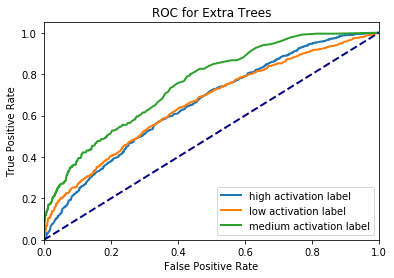

In [120]:
plt.figure()
lw = 2
plt.plot(fpr_et[2], tpr_et[2], lw=lw, label='high activation label')
plt.plot(fpr_et[0], tpr_et[0], lw=lw, label='low activation label')
plt.plot(fpr_et[1], tpr_et[1], lw=lw, label='medium activation label')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Extra Trees')
plt.legend(loc="lower right")
plt.show()

# 4. AdaBoost

In [101]:
seed = 7
num_trees = 1000
kfold = model_selection.KFold(n_splits=10, random_state=seed)
ab = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
# Train the model on training data
ab.fit(train_features, train_labels);
y_pred_ab = ab.predict_proba(test_features)

In [127]:
results = model_selection.cross_val_score(ab, test_features, test_labels, cv=kfold)
print(results.mean())

0.502640527118


In [114]:
# Compute ROC curve and ROC area for each class
#classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 1000, random_state = 42))
#y_score = classifier.fit(train_features, train_labels).decision_function(test_features)
fpr_ab = dict()
tpr_ab = dict()
roc_auc_ab = dict()
for i in range(n_classes):
    fpr_ab[i], tpr_ab[i], _ = roc_curve(test_labels[:,i], y_pred_ab[:,i])
    roc_auc_ab[i] = auc(fpr_ab[i], tpr_ab[i])

# Compute micro-average ROC curve and ROC area
fpr_ab["micro"], tpr_ab["micro"], _ = roc_curve(test_Y.ravel(), y_pred_rf.ravel())
roc_auc_ab["micro"] = auc(fpr_ab["micro"], tpr_ab["micro"])

# 5. Stochastic Gradient Boosting

In [111]:
seed = 7
num_trees =1000
kfold = model_selection.KFold(n_splits=10, random_state=seed)
sgb = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
# Train the model on training data
sgb.fit(train_features, train_labels);
y_pred_sgb = sgb.predict_proba(test_features)

In [128]:
results = model_selection.cross_val_score(sgb, test_features, test_labels, cv=kfold)
print(results.mean())

0.677910011852


looking for mislabeled cross feel 5*5 metrics con

In [115]:
# Compute ROC curve and ROC area for each class
#classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 1000, random_state = 42))
#y_score = classifier.fit(train_features, train_labels).decision_function(test_features)
fpr_sgb = dict()
tpr_sgb = dict()
roc_auc_sgb = dict()
for i in range(n_classes):
    fpr_sgb[i], tpr_sgb[i], _ = roc_curve(test_labels[:,i], y_pred_sgb[:,i])
    roc_auc_sgb[i] = auc(fpr_sgb[i], tpr_sgb[i])

# Compute micro-average ROC curve and ROC area
fpr_sgb["micro"], tpr_sgb["micro"], _ = roc_curve(test_Y.ravel(), y_pred_rf.ravel())
roc_auc_sgb["micro"] = auc(fpr_sgb["micro"], tpr_sgb["micro"])

# run ROC for high activation rate group

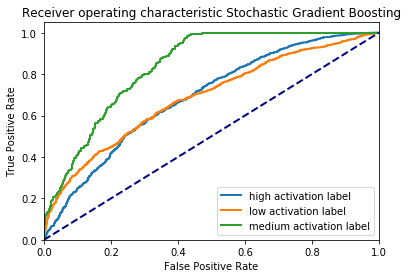

In [118]:
plt.figure()
lw = 2
plt.plot(fpr_sgb[2], tpr_sgb[2], lw=lw, label='high activation label')
plt.plot(fpr_sgb[0], tpr_sgb[0], lw=lw, label='low activation label')
plt.plot(fpr_sgb[1], tpr_sgb[1], lw=lw, label='medium activation label')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Stochastic Gradient Boosting')
plt.legend(loc="lower right")
plt.show()